# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [24]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [58]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [63]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:my-test-thing-556e:Initialising MQTT connection for Thing 'dcd:things:my-test-thing-556e'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:my-test-thing-556e HTTP/1.1" 200 12420


KeyError: 'TEXT'

What does a Thing look like?

In [61]:
my_thing.to_json()

{'id': 'dcd:things:my-test-thing-556e',
 'name': 'My Test Thing',
 'description': 'Just a Thing to test!',
 'type': 'Test',
 'properties': [{'id': '-28fb',
   'name': '\r\n',
   'description': '',
   'type': 'ACCELEROMETER',
   'dimensions': [{'name': 'x',
     'description': 'Acceleration force that is applied to a device on physical axe x, including the force of gravity.',
     'unit': 'm/s2'},
    {'name': 'y',
     'description': 'Acceleration force that is applied to a device on physical axe y, including the force of gravity.',
     'unit': 'm/s2'},
    {'name': 'z',
     'description': 'Acceleration force that is applied to a device on physical axe z, including the force of gravity.',
     'unit': 'm/s2'},
    {'name': 'x',
     'description': 'Acceleration force that is applied to a device on physical axe x, including the force of gravity.',
     'unit': 'm/s2'},
    {'name': 'y',
     'description': 'Acceleration force that is applied to a device on physical axe y, including th

Which property do we want to explore and over which time frame?

In [62]:
from datetime import datetime
# What dates?
START_DATE = "2019-10-08 21:17:00"
END_DATE = "2019-11-08 21:25:00"

from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [29]:
PROPERTY_NAME = "Accelerometer"

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:my-test-thing-556e/properties/-4208?from=1570562220000.0&to=1573244700000.0 HTTP/1.1" 200 74885


How many data point did we get?

In [30]:
print(len(my_property.values))

818


Display values

In [31]:
my_property.values

[[1570808298782, 1570808298758, -0.18, 9.38],
 [1570808298808, 1570808298758, -0.18, 9.38],
 [1570808298964, 1570808298925, -0.22, 9.43],
 [1570808298995, 1570808298925, -0.22, 9.43],
 [1570808299448, 1570808299433, -0.23, 9.41],
 [1570808299481, 1570808299433, -0.23, 9.41],
 [1570808299963, 1570808299937, -0.23, 9.4],
 [1570808299987, 1570808299937, -0.23, 9.4],
 [1570808300457, 1570808300442, -0.2, 9.38],
 [1570808300490, 1570808300442, -0.2, 9.38],
 [1570808300958, 1570808300944, -0.2, 9.37],
 [1570808300990, 1570808300944, -0.2, 9.37],
 [1570808301467, 1570808301449, -0.21, 9.39],
 [1570808301499, 1570808301449, -0.21, 9.39],
 [1570808301974, 1570808301951, -0.23, 9.38],
 [1570808301997, 1570808301951, -0.23, 9.38],
 [1570808302474, 1570808302456, -0.23, 9.42],
 [1570808302510, 1570808302456, -0.23, 9.42],
 [1570808302969, 1570808302958, -0.2, 9.39],
 [1570808303005, 1570808302958, -0.2, 9.39],
 [1570808303558, 1570808303470, -0.19, 9.36],
 [1570808303593, 1570808303470, -0.19, 9.3

# From CSV

In [49]:
from numpy import genfromtxt
import pandas as pd
data = genfromtxt('data.csv', delimiter=',')


,x,y,z
2019-10-07 16:56:11.446,0.009701,-0.074115,-0.185453
2019-10-07 16:56:11.533,0.027269,-0.069583,-0.198343
2019-10-07 16:56:11.643,0.039780,-0.066105,-0.186640
2019-10-07 16:56:11.785,0.052060,-0.077641,-0.170837
2019-10-07 16:56:11.884,0.039715,-0.071593,-0.188471
...,...,...,...
2019-10-07 16:56:38.723,-0.838292,0.228826,0.044570
2019-10-07 16:56:38.886,-0.810323,0.222667,0.028433
2019-10-07 16:56:38.886,-0.849075,0.214866,0.060519
2019-10-07 16:56:39.045,-0.849561,0.217760,0.058103


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from numpy import ma
data = np.array(my_property.values)

DEBUG:matplotlib:$HOME=C:\Users\liuyi
DEBUG:matplotlib:CONFIGDIR=C:\Users\liuyi\.matplotlib
DEBUG:matplotlib:matplotlib data path: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.1.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'runpy', 'importlib', 'importlib._b

DEBUG:matplotlib:CACHEDIR=C:\Users\liuyi\.matplotlib
DEBUG:matplotlib.font_manager:font search path ['c:\\users\\liuyi\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf', 'c:\\users\\liuyi\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\afm', 'c:\\users\\liuyi\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\pdfcorefonts']
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Bold.ttf
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\ttf\cmmi10.ttf
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSerif-Italic.ttf
DEBUG:matplotlib.fo

DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\mvboli.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\corbelb.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GILI____.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FRAMDCN.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\Inkfree.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ALGER.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\BOOKOSBI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ITCBLKAD.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LFAXDI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\OLDENGL.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\VerdanaPro-Bold.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\mingliub.ttc
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ANTQUAI.TTF
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GARAIT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\simsun.ttc
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LeelawUI.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\palabi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\corbelb.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\SCHLBKI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LSANS.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FRABK.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\LCALLIG.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\VerdanaPro-CondLight.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\CALISTBI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\Dengb.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\HPSimplified_It.ttf
DEBUG:matpl

DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\gadugi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\seguisb.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\VerdanaPro-Regular.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BOD_CR.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\GOTHICB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\LBRITEI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\marlett.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\YuGothL.ttc
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\Candara.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ntailu.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GOTHIC.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\PERTILI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\PLAYBILL.TTF
DEBUG:matplotlib.

DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\GOTHICI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BRLNSR.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LHANDW.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ArialNova-LightItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BOD_BLAI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\CURLZ___.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BERNHC.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\arialbd.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\CALISTB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ROCKBI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\simsunb.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\BOD_CR.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\HPSimplified_Lt.ttf
DEBUG:

DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BOD_CB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GeorgiaPro-Black.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\LBRITEDI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\mmrtext.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\FREESCPT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\VerdanaPro-CondItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\Candaral.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\HTOWERTI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ANTQUABI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\segoepr.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\PRISTINA.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ntailu.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\WINGDNG2.T

DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LFAXD.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\VerdanaPro-CondBoldItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\HARNGTON.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\TCCB____.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\BRLNSDB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\constanz.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GillSansCondExtraNova.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\msyi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\BOD_I.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\CALISTB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ARIALNB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\javatext.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ArialNov

DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\FORTE.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\JUICE___.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\Gabriola.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\micross.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\PER_____.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FRABKIT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\GARAIT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\Deng.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ANTQUAB.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\segoeuil.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\LFAXDI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GillSansItNova.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\BELL.TTF
DEBUG:matplotlib.font_ma

DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\verdanai.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\BRUSHSCI.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\timesbi.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FORTE.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\verdanaz.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\RockwellNovaCond-BoldItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\OLDENGL.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\VINERITC.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\ArialNova-Bold.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\seguibl.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\HPSimplified_Rg.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\LBRITED.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\

DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ebrimabd.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\GillSansNova.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FRADMIT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\ArialNovaCond-Light.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\GIL_____.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Program Files (x86)\Adobe\Acrobat DC\Resource\Font\AdobeDevanagari-BoldItalic.otf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\SHOWG.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\DUBAI-REGULAR.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\VerdanaPro-CondLightItalic.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts\FRAHVIT.TTF
DEBUG:matplotlib.font_manager:createFontDict: C:\Windows\Fonts\RockwellNovaCond-Light.ttf
DEBUG:matplotlib.font_manager:createFontDict: C:\windows\Fonts

DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\afm\pncbi8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\pdfcorefonts\Courier-Bold.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\afm\pagdo8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\afm\pbkd8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\afm\pzcmi8a.afm
DEBUG:matplotlib.font_manager:createFontDict: c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\mpl-data\fonts\pdfcorefonts\Helvetica-Bo

c:\users\liuyi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


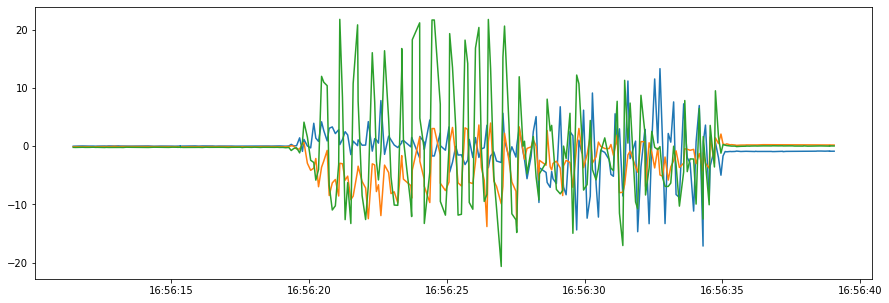

In [50]:
figure(num=None, figsize=(15, 5))
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['x', 'y', 'z'])
data_frame
t = data_frame.index
plt.plot(t, data_frame.x, t, data_frame.y, t, data_frame.z)

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 3.9713636363636367
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Consolas' (consolai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Nova' (ArialNova.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia Pro' (GeorgiaPro-CondBoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dubai' (DUBAI-BOLD.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findf

DEBUG:matplotlib.font_manager:findfont: score(<Font 'KaiTi' (simkai.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gigi' (GIGI.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Niagara Solid' (NIAGSOL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 6.888636363636364
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Nova' (ArialNovaCond-Bold.ttf) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calib

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Montserrat' (Montserrat-SemiBold.ttf) normal normal semibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Elephant' (ELEPHNTI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Constantia' (constan.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Haettenschweiler' (HATTEN.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Nova' (RockwellNova-Light.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Nova' (RockwellNova-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Mongolian Baiti' (monbaiti.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:fi

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Montserrat' (Montserrat-LightItalic.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia Pro' (GeorgiaPro-CondSemiBold.ttf) normal normal semibold condensed>) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell Nova' (RockwellNova-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Vladimir Script' (VLADIMIR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisbi.ttf) italic normal semibold normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-Italic.otf) italic normal 400 normal>) = 11

DEBUG:matplotlib.font_manager:findfont: score(<Font 'FangSong' (simfang.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Rockwell' (ROCKI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Uighur' (MSUIGHUR.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei' (msyhl.ttc) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Eras Light ITC' (ERASLGHT.TTF) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Leelawadee' (LEELAWDB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans Nova' (GillSans

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana Pro' (VerdanaPro-SemiBold.ttf) normal normal semibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Nova' (ArialNova-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans Nova' (GillSansNova.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT' (GILBI___.TTF) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Unicode' (l_10646.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Broadway' (BROADW.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manag

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Nova' (ArialNovaCond.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe MDL2 Assets' (segmdl2.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrimabd.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans Nova' (GillSansCondItNova.ttf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibril.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgun.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gill Sans MT' (GIL_____.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: sco

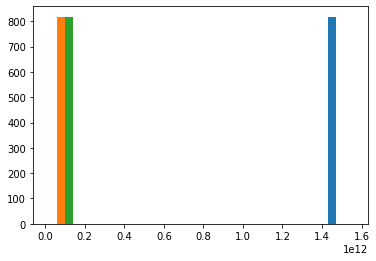

In [39]:
plt.hist(data[:,1:])
plt.show()

# Generate statistics with NumPy and Pandas

ModuleNotFoundError: No module named 'scipy'

In [41]:
np.min(data[:,1:4], axis=0)

array([ 1.5708083e+12, -2.8000000e-01,  9.3000000e+00])

In [51]:
from scipy.stats import kurtosis, skew
skew(data[:,1:4])

array([-0.89688613, -1.23809469,  0.76757991])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [52]:
data[:10,1:]

array([[ 0.00970082, -0.07411532, -0.18545274],
       [ 0.02726864, -0.06958251, -0.19834329],
       [ 0.03978035, -0.06610464, -0.18664022],
       [ 0.05206013, -0.07764083, -0.17083664],
       [ 0.0397151 , -0.07159336, -0.188471  ],
       [ 0.02992328, -0.07444451, -0.18695566],
       [ 0.03363691, -0.10220957, -0.15930049],
       [ 0.01179356, -0.06460355, -0.18997429],
       [ 0.02983755, -0.06932511, -0.17842238],
       [ 0.04382452, -0.06352246, -0.19168401]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [53]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0,1,2
count,272.000000,272.000000,272.000000
mean,-0.557388,-1.787206,-0.051416
std,3.745995,3.214806,7.316358
min,-17.142246,-13.792576,-20.642885
25%,-0.903258,-3.436087,-2.816740
50%,0.025114,-0.084160,-0.173673
75%,0.410247,0.214146,0.080619
max,13.336728,3.991868,21.804655


In [54]:
data_frame.rolling(10).std()

,0,1,2
2019-10-07 16:56:11.446,NaN,NaN,NaN
2019-10-07 16:56:11.533,NaN,NaN,NaN
2019-10-07 16:56:11.643,NaN,NaN,NaN
2019-10-07 16:56:11.785,NaN,NaN,NaN
2019-10-07 16:56:11.884,NaN,NaN,NaN
...,...,...,...
2019-10-07 16:56:38.723,0.013891,0.007798,0.015456
2019-10-07 16:56:38.886,0.016892,0.007907,0.014749
2019-10-07 16:56:38.886,0.015726,0.008693,0.013981
2019-10-07 16:56:39.045,0.015876,0.008522,0.012299


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

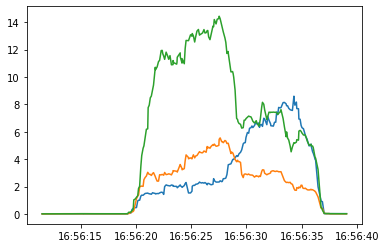

In [55]:
rolling2s = data_frame.rolling('2s').std()
plt.plot(rolling2s)
plt.show()

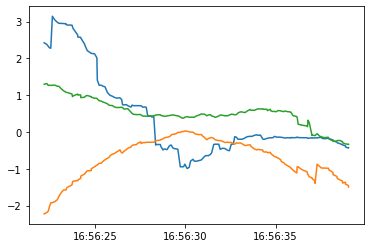

In [56]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

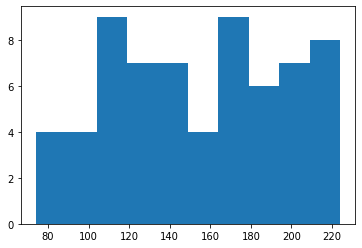

In [57]:
plt.hist(np.where(np.diff(np.sign(data[:,1]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions